# Predição de regiões promotores (Bacillus subtilis) com Naive Bayes

# Importação das bibliotecas e módulos do Python

In [48]:
import numpy as np
import re
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Importação do conjunto de dados

In [41]:
atributos = ['Sequencia', 'Classe']
df = pd.read_csv('promotores_bd.csv', names=atributos)

# Pré processamento do conjunto de dados

In [13]:
# Definição da função para a conversão de sequências do tipo string em k-mers (hexâmeros)
def getKmers(Sequencia, size=6):
    return [Sequencia[x:x+size].lower() for x in range(len(Sequencia) - size + 1)]

In [14]:
# Conversão das sequências do conjunto de dados em k-mers usando a função getKmers: 

df['words'] = df.apply(lambda x: getKmers(x['Sequencia']), axis=1)
df = df.drop('Sequencia', axis=1)

In [15]:
df.head()

,Classe,words
0,+,"[cgctct, gctcta, ctctat, tctatc, ctatcc, tatcc..."
1,+,"[gtttcc, tttccc, ttccct, tccctt, ccctta, cctta..."
2,+,"[ggtccg, gtccgt, tccgtt, ccgttt, cgtttt, gtttt..."
3,+,"[gtatat, tatata, atatat, tatatt, atatta, tatta..."
4,+,"[aatagt, atagtt, tagtta, agttat, gttatc, ttatc..."


In [17]:
# Conversão das listas de k-mers geradas em cadeias de palavras para que o vetorizador de contagem posse usar:

seq_textos = list(df['words'])
for item in range(len(seq_textos)):
    seq_textos[item] = ' '.join(seq_textos[item])
y = df.iloc[:, 0].values    

# Verificação da conversão:

seq_textos[0]

'cgctct gctcta ctctat tctatc ctatcc tatcct atcctg tcctgg cctggg ctgggt tgggtt gggttt ggtttt gttttt tttttg ttttgg tttggc ttggct tggctg ggctgt gctgtg ctgtgc tgtgcc gtgcca tgccaa gccaaa ccaaaa caaaag aaaagg aaaggg aaggga agggaa gggaat ggaata gaataa aataat ataatg taatga aatgaa atgaaa tgaaaa gaaaaa aaaaac aaaaca aaacaa aacaat acaata caatag aatagc atagca tagcat agcatc gcatct catctt atcttt tctttg ctttgt tttgtg ttgtga tgtgaa gtgaag tgaagt gaagtt aagttt agtttg gtttgt tttgta ttgtat tgtatt gtatta tattat attata ttataa tataat ataata taataa'

In [20]:
# Conversão dos valores dos rótulos de classe para a tarefa de classificação:

novo_y = LabelEncoder().fit_transform(y)
print("antes:", df["Classe"].values[265:275])
print("depois:", novo_y[265:275])

antes: ['+' '+' '+' '+' '+' '-' '-' '-' '-' '-']
depois: [0 0 0 0 0 1 1 1 1 1]


In [23]:
# Conversão das palavras k-mer em vetores numéricos de comprimento uniforme:
# Construção da Sacola de Palavras com CountVectorizer()

cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(seq_textos)
print(X.shape)

(540, 31589)


# Construção e treinamento do algoritmo Naive Bayes

# Conjunto de treinamento = 80% dos dados
Divisão do conjunto de dados em conjunto de treinamento (80%) e conjunto de teste (20%):

In [42]:
# Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(X, novo_y, test_size = 0.2, random_state = 0)

In [43]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((432, 31589), (108, 31589))

In [44]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((432,), (108,))

# Aprimoramento dos parâmetros

In [32]:
# Busca pelos parâmetros mais adequados para a classificação pelo algoritmo Naive Bayes Multinomial:

parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

search = GridSearchCV(MultinomialNB(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]},
             verbose=1)

In [33]:
melhor_parametro = search.best_estimator_
print ("O parâmetro mais adequado foi:", melhor_parametro)

O parâmetro mais adequado foi: MultinomialNB(alpha=0.9)


In [39]:
# Treinamento do classificador:

classificador = MultinomialNB(alpha=0.9)
classificador.fit(X_train, Y_train)

# Avaliação da acurácia obtida pelo clasificador durante o treinamento:

y_pred = classificador.predict(X_train)
acuracia = accuracy_score(Y_train, y_pred)
print ("A acurácia obtida durante o treinamento foi:", acuracia)

A acurácia obtida durante o treinamento foi: 1.0


# Predição pelo algoritmo Naive Bayes

In [40]:
# Prediçao e avaliação da acurácia obtida pelo clasificador utilizando o conjunto de teste:

y_pred2 = classificador.predict(X_test)
acuracia2 = accuracy_score(Y_test, y_pred2)
print ("A acurácia obtida durante o treinamento foi:", acuracia2)

A acurácia obtida durante o treinamento foi: 0.6759259259259259


[[39 11]
 [24 34]]


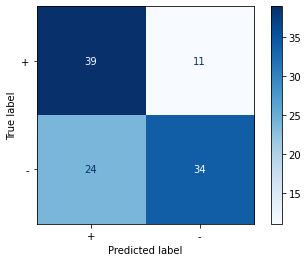

In [47]:
disp = plot_confusion_matrix (classificador, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.show()